## Let us first import the required libraries

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Now we are taking the input which is "attachment_titanic.csv" file from the kaggle datasets

In [182]:
train_ds = pd.read_csv('datasets/attachment_titanic.csv')

## Now let us explore the data, check for null values, check for outliers, check for best features.
## Basically check for relationships between the data

In [183]:
train_ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
train_ds.shape

(891, 12)

In [185]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
test_ds = pd.read_csv('datasets/attachment_titanic_test.csv')

In [188]:
test_ds.shape

(418, 11)

In [189]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [190]:
test_ds.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [191]:
tr_corr = train_ds.corr()
tr_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

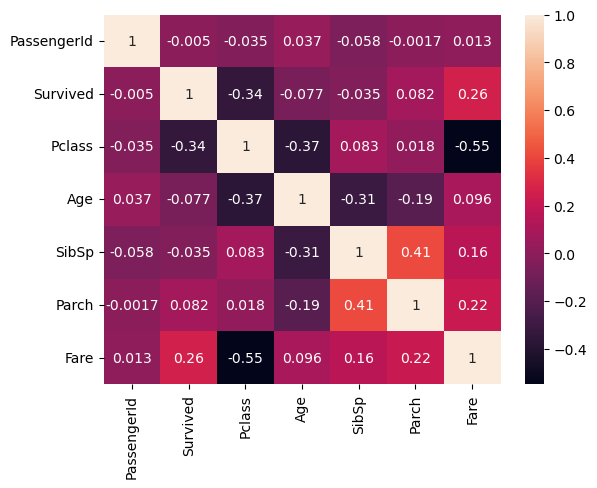

In [192]:
sns.heatmap(tr_corr,annot=True)

In [193]:
list(train_ds.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<AxesSubplot:xlabel='Survived', ylabel='count'>

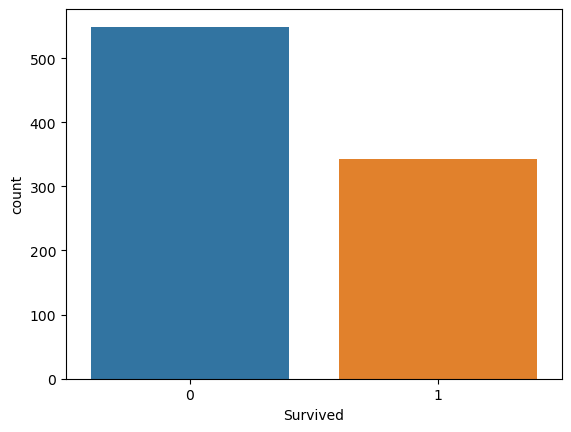

In [194]:
sns.countplot(x='Survived',data=train_ds)

## Inference
- The number of people who died are more

<AxesSubplot:xlabel='Sex', ylabel='count'>

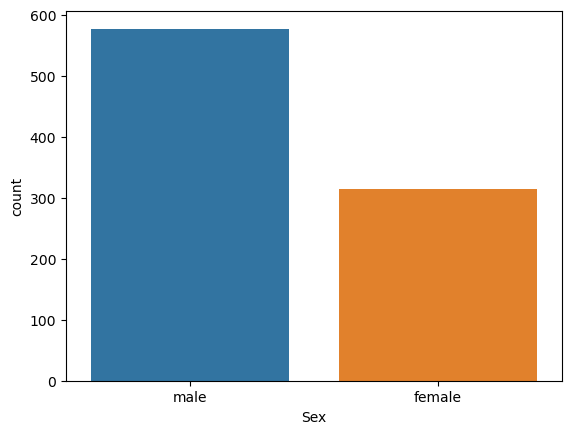

In [195]:
sns.countplot(x='Sex',data=train_ds)

## Inferense
- Males were more in number in the titatic

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

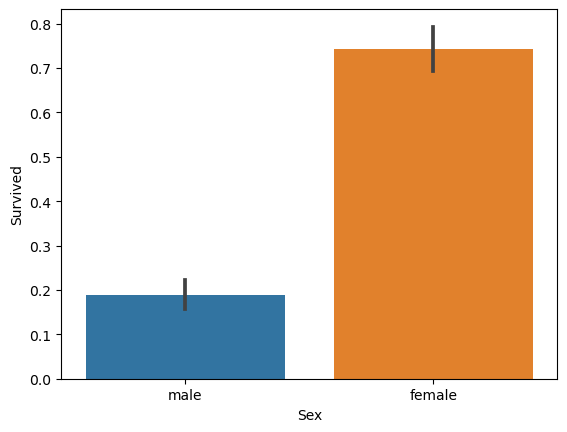

In [196]:
sns.barplot(x='Sex',y='Survived',data=train_ds)

## Inference
- inspite the #males are more, females survived more in number

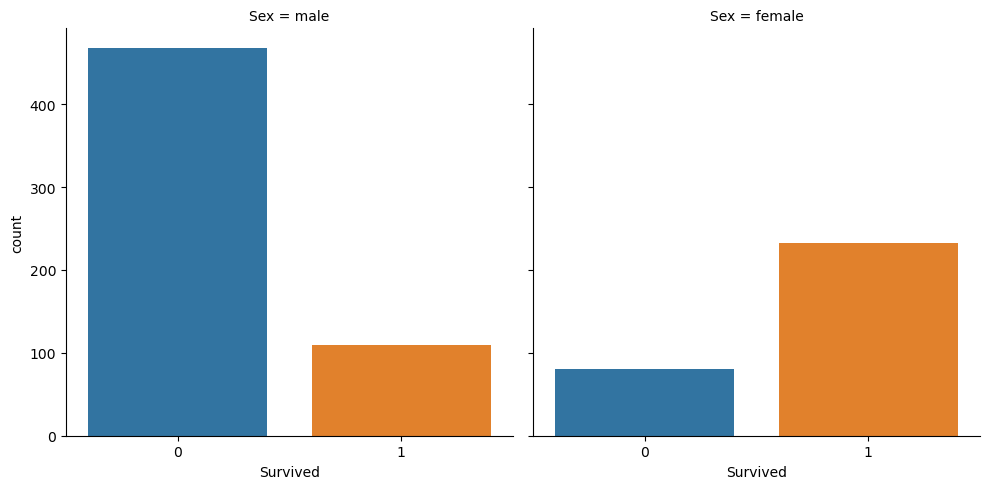

In [197]:
sns.factorplot(x='Survived',col='Sex',kind='count',data=train_ds)

## Inference
- In this we can see that more number of males died and more number of females survived

In [198]:
train_ds['Pclass'].unique()

array([3, 1, 2])

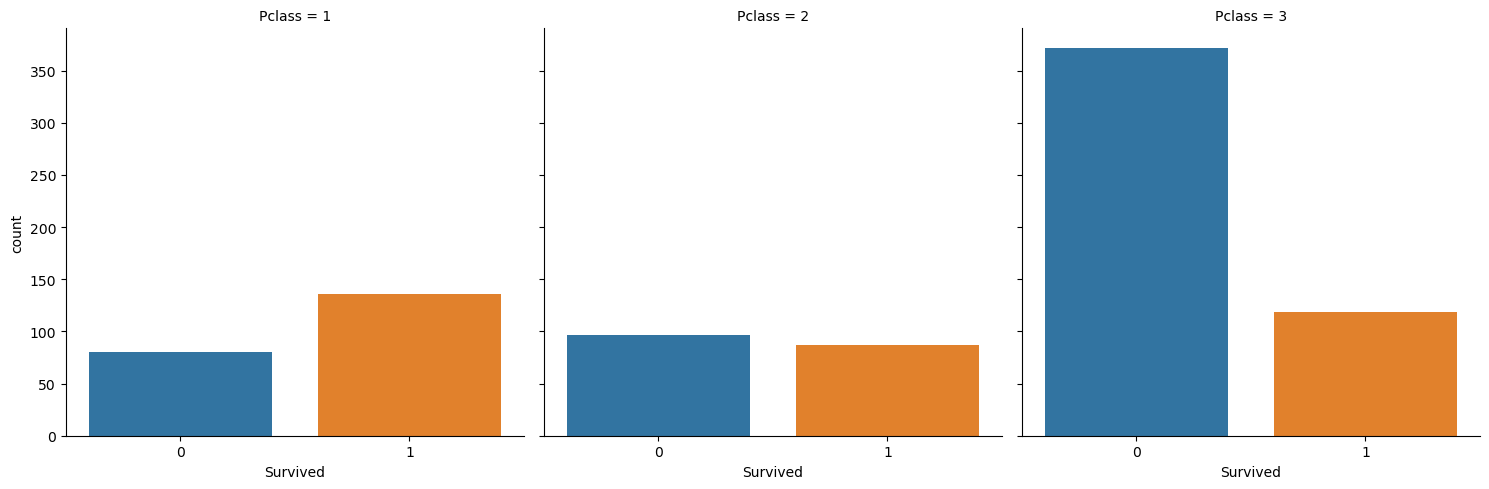

In [199]:
sns.factorplot(x='Survived',col='Pclass',kind='count',data=train_ds)

## Inference
- 1st class survived more
- 2nd class survived less when compared to 1st class
- 3rd class died most.
- so we can say wealthy people are given more priority

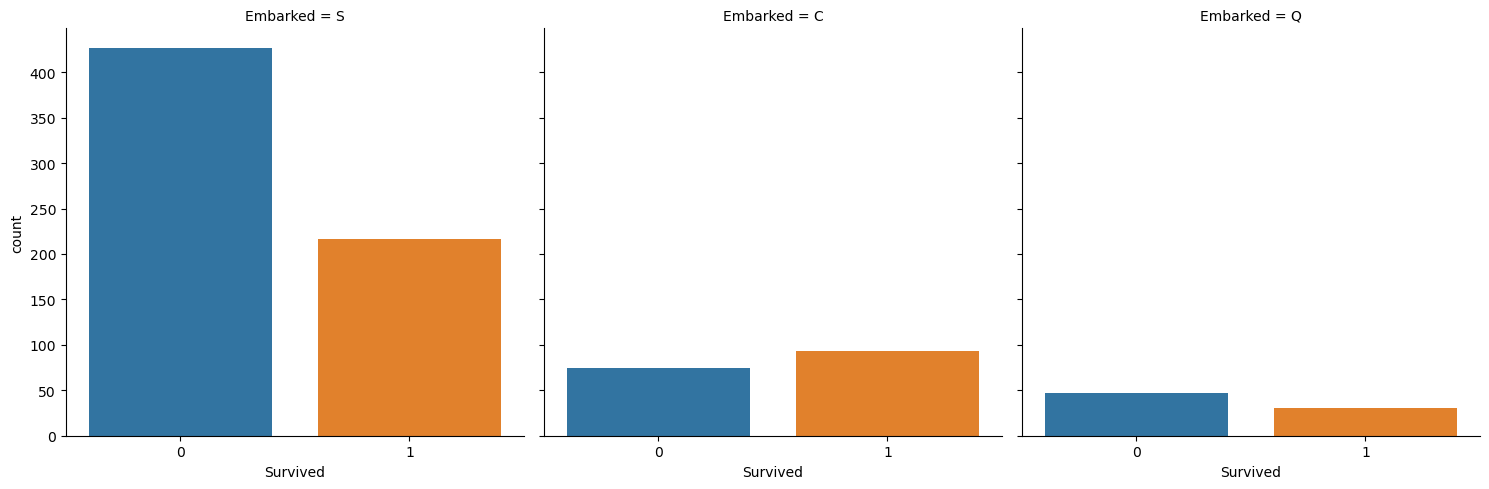

In [200]:
sns.factorplot(x='Survived',col='Embarked',kind='count',data=train_ds)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

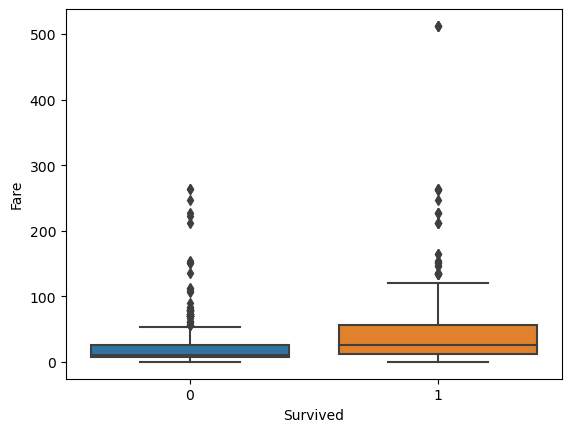

In [201]:
sns.boxplot(x='Survived',y='Fare',data=train_ds)

## Inference
- Fare price has no impact on the survival of people

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

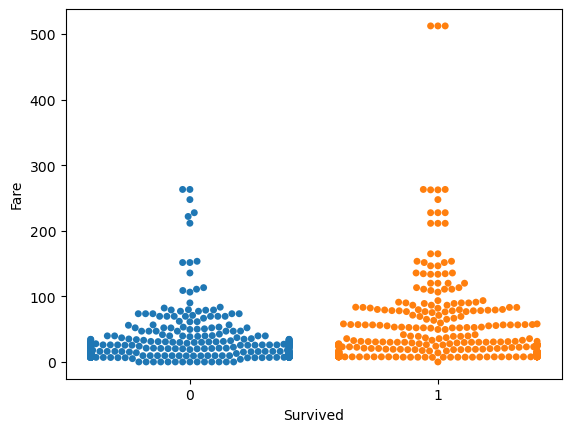

In [202]:
sns.swarmplot(x='Survived',y='Fare',data=train_ds)

In [203]:
train_ds['Sex'] = train_ds['Sex'].apply(lambda sex:0 if sex =='male' else 1)

In [204]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [205]:
y = train_ds['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [206]:
imp_cols = ["Pclass",'Sex',"Age","SibSp"]

In [207]:
features = train_ds[list(imp_cols)].values

In [208]:
features

array([[ 3.,  0., 22.,  1.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., nan,  1.],
       [ 1.,  0., 26.,  0.],
       [ 3.,  0., 32.,  0.]])

In [209]:
from sklearn.impute import SimpleImputer

In [210]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')

In [211]:
X = imp.fit_transform(features)

In [212]:
X

array([[ 3.        ,  0.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

In [213]:
from sklearn import tree
myTree_1 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)

In [214]:
myTree_1

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [215]:
myTree_1=myTree_1.fit(X,y)

In [216]:
list(zip(imp_cols,myTree_1.feature_importances_))

[('Pclass', 0.26627379767117476),
 ('Sex', 0.6091119294962372),
 ('Age', 0.12461427283258814),
 ('SibSp', 0.0)]

In [217]:
import graphviz

In [218]:
from sklearn import tree

In [219]:
X

array([[ 3.        ,  0.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

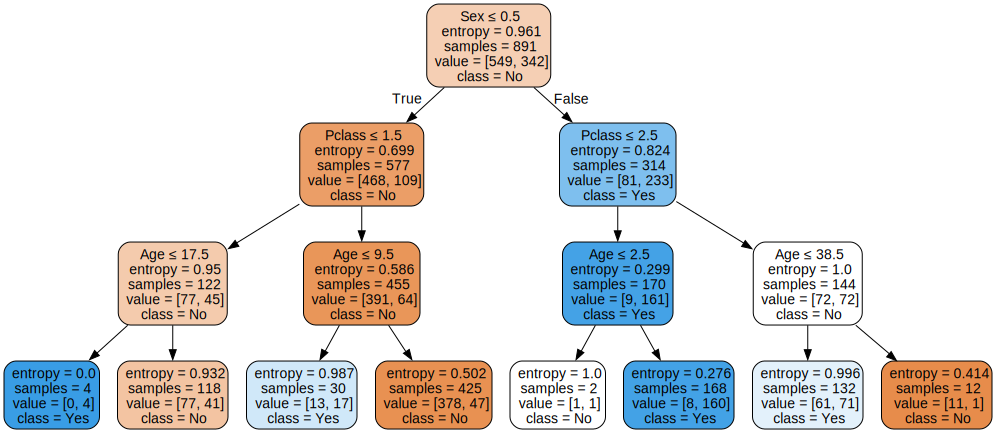

In [220]:
dot_data = tree.export_graphviz(myTree_1,out_file=None,feature_names=["Pclass","Sex","Age","SibSp"],
                               filled=True,rounded=True,class_names=['No','Yes'],
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

## This tree will help you to understand how the decision tree works

In [221]:
myTree_1.score(X,y)

0.8069584736251403

In [222]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
test_ds['Sex'] = test_ds['Sex'].apply(lambda sex:0 if sex=='male' else 1)

In [224]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
features_test = test_ds[list(imp_cols)].values

In [226]:
features_test

array([[ 3. ,  0. , 34.5,  0. ],
       [ 3. ,  1. , 47. ,  1. ],
       [ 2. ,  0. , 62. ,  0. ],
       ...,
       [ 3. ,  0. , 38.5,  0. ],
       [ 3. ,  0. ,  nan,  0. ],
       [ 3. ,  0. ,  nan,  1. ]])

In [227]:
imp_test = SimpleImputer(missing_values=np.nan,strategy='mean')

In [228]:
x_test = imp_test.fit_transform(features_test)

In [229]:
x_test

array([[ 3.        ,  0.        , 34.5       ,  0.        ],
       [ 3.        ,  1.        , 47.        ,  1.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  1.        ]])

In [230]:
y_pred = myTree_1.predict(x_test)

In [231]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [232]:
from sklearn import metrics
pred = myTree_1.predict(X)
df_confusion = metrics.confusion_matrix(y,pred)
df_confusion

array([[467,  82],
       [ 90, 252]])

<AxesSubplot:>

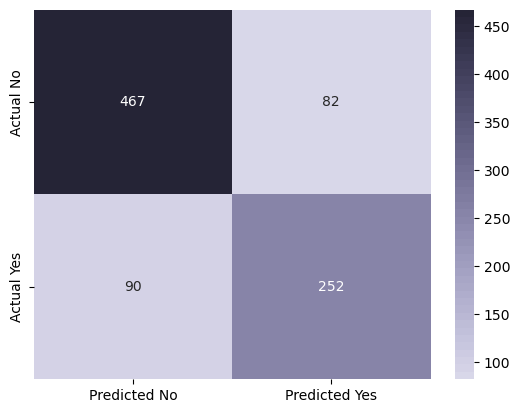

In [233]:
cmap = sns.cubehelix_palette(50,hue=0.5,rot=0)
sns.heatmap(df_confusion,cmap=cmap,xticklabels=["Predicted No","Predicted Yes"],yticklabels=["Actual No","Actual Yes"],annot=True,fmt='d')

In [234]:
max_depth=10
min_sample_split=5
my_tree_two=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=5,random_state=42)
my_tree_two=my_tree_two.fit(X,y)

In [235]:
print("Accuracy of the new Tree:",my_tree_two.score(X,y))
print("Accuracy of the old Tree:",myTree_1.score(X,y))

Accuracy of the new Tree: 0.8720538720538721
Accuracy of the old Tree: 0.8069584736251403


In [236]:
pred=my_tree_two.predict(X)

In [237]:
df_confusion_new=metrics.confusion_matrix(y,pred)
df_confusion_new

array([[512,  37],
       [ 77, 265]])

<AxesSubplot:>

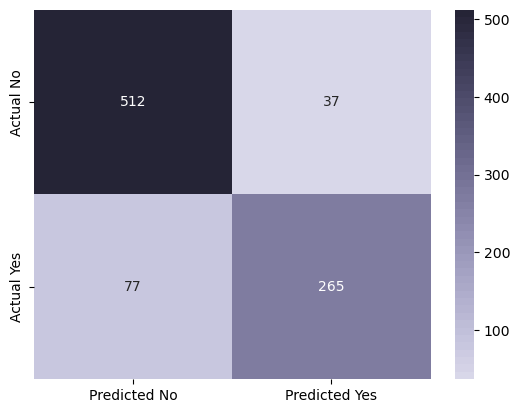

In [238]:
cmap=sns.cubehelix_palette(50,hue=0.5,rot=0)
sns.heatmap(df_confusion_new,cmap=cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'],annot=True,fmt='d')

In [239]:
train_ds['Family_Size']=train_ds.SibSp+train_ds.Parch+1

In [240]:
train_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1


In [241]:
from sklearn.ensemble import RandomForestClassifier
my_forest = RandomForestClassifier(max_depth=10,n_estimators=100,random_state=1)

In [242]:
my_forest.fit(X,y)

RandomForestClassifier(max_depth=10, random_state=1)

In [243]:
print(my_forest.score(X,y))

0.9001122334455668


In [244]:
pred=my_forest.predict(X)

In [245]:
list(zip(imp_cols,my_forest.feature_importances_))

[('Pclass', 0.15563663936098054),
 ('Sex', 0.39584442870450576),
 ('Age', 0.37593752393053415),
 ('SibSp', 0.07258140800397943)]

In [246]:
df_confusion_rf = metrics.confusion_matrix(y,pred)
df_confusion_rf

array([[518,  31],
       [ 58, 284]])

<AxesSubplot:>

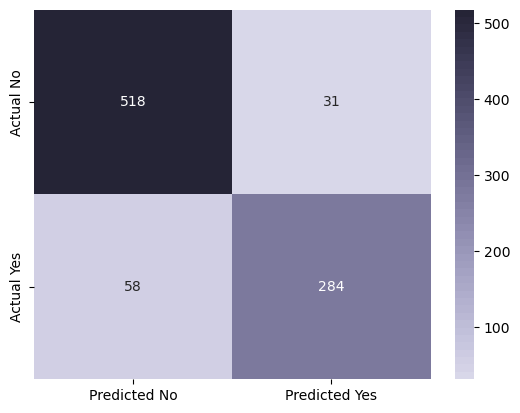

In [247]:
cmap=sns.cubehelix_palette(50,hue=0.5,rot=0)
sns.heatmap(df_confusion_rf,cmap=cmap,xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'],annot=True,fmt='d')

## Grid Search

In [248]:
max_depth=[5,10,15]
criterion = ['gini','entropy']

In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
my_tree_three = tree.DecisionTreeClassifier()
grid =  GridSearchCV(estimator=my_tree_three,cv=3,param_grid=dict(max_depth=max_depth,criterion=criterion))

In [251]:
grid.fit(X,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15]})

In [252]:
grid.best_score_

0.8103254769921436

In [253]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [254]:
my_tree_three=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)

In [255]:
my_tree_three.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [256]:
my_tree_three.score(X,y)

0.8832772166105499

#                                      THANKYOU 